In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# TMDB 5000 Movies

In [29]:
tmdb = pd.read_csv('dados/tmdb_5000_movies.csv')

In [30]:
tmdb.original_language.describe()

count     4803
unique      37
top         en
freq      4505
Name: original_language, dtype: object

In [31]:
lingua_original_filmes = tmdb.original_language.value_counts().to_frame().reset_index()
lingua_original_filmes.columns = ['language', 'total']

In [32]:
lingua_original_filmes

,language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


<AxesSubplot:xlabel='language', ylabel='total'>

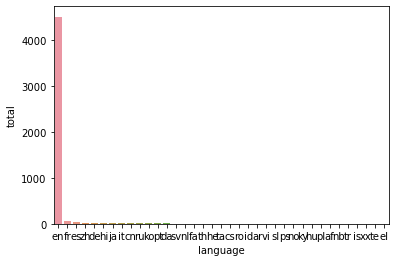

In [33]:
#Neste caso, como há discrepância muito grande entre a primeira língua e todas as demais, é preciso fugir desse tipo de visualização
sns.barplot(x="language", y="total", data=lingua_original_filmes)

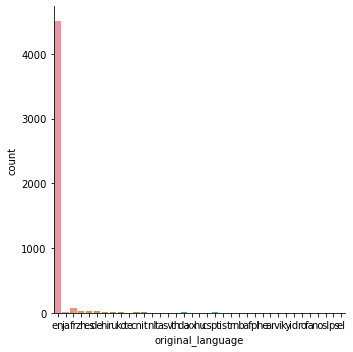

In [34]:
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x7efd355db1f0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

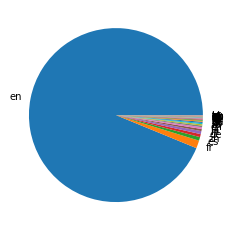

In [35]:
#Não representa a melhor leitura
plt.pie(lingua_original_filmes['total'], labels=lingua_original_filmes['language'])

### Top 3 Línguas mais utilizadas no cinema

In [36]:
linguas_mais_comuns = lingua_original_filmes.query('total > 30')

<AxesSubplot:xlabel='language', ylabel='total'>

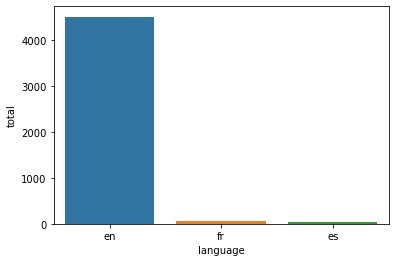

In [37]:
sns.barplot(x="language", y="total", data=linguas_mais_comuns)

### Filmes em inglês dominam o mercado

In [41]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_ingles
print(total_ingles, total_do_resto)

4505 298


In [43]:
dados = {
    'language': ['english', 'others'],
    'total': [total_ingles, total_do_resto]
}
dados

{'language': ['english', 'others'], 'total': [4505, 298]}

In [44]:
pd.DataFrame(dados)

,language,total
0,english,4505
1,others,298


<AxesSubplot:>

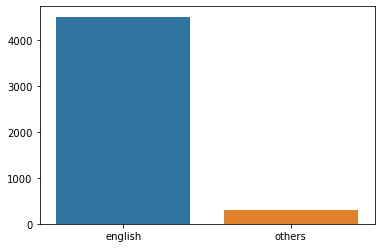

In [45]:
sns.barplot(x='language', y='total', data=dados)

### Filmes em outras línguas

In [68]:
outras_linguas = tmdb.query("original_language != 'en'")

In [69]:
total_outras_linguas = tmdb.query("original_language != 'en'").original_language.value_counts()

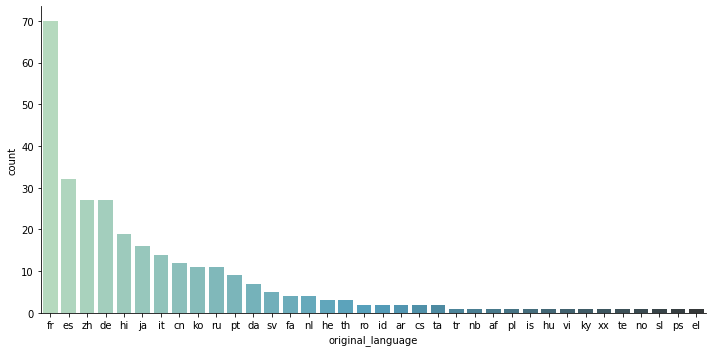

In [72]:
#Formatado para facilitar a leitura e interpretação dos dados
sns.catplot(x="original_language", 
            data=outras_linguas, 
            kind="count", 
            aspect=2, 
            palette="GnBu_d",
            order=total_outras_linguas.index)

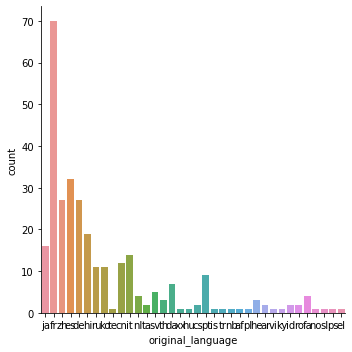

In [73]:
#Formatação original do seaborn, que não apresenta os dados da melhor maneira:
sns.catplot(x="original_language", 
            data=outras_linguas, 
            kind="count")

# Resumo da análise dos 5000 filmes da coleção:

### A grande maioria dos filmes lançados é em inglês

<AxesSubplot:>

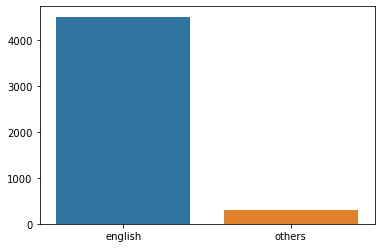

In [74]:
sns.barplot(x='language', y='total', data=dados)

#### Francês e espanhol ocupam segundo e terceiro lugares entre as linguas originais dos filmes, ainda que bem aquém da primeira posição (inglês). A partir do 5º lugar há uma pulverização maior e em menor grau de importância

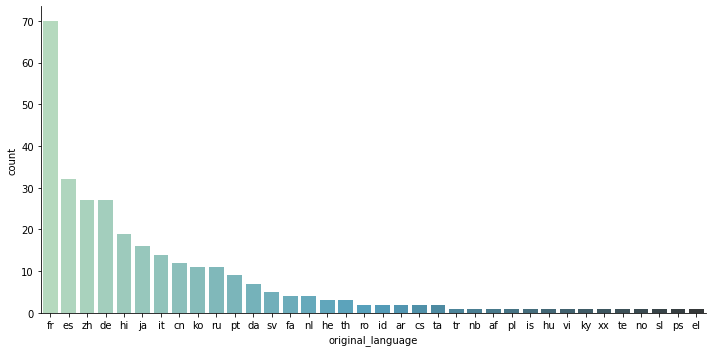

In [75]:
sns.catplot(x="original_language", 
            data=outras_linguas, 
            kind="count", 
            aspect=2, 
            palette="GnBu_d",
            order=total_outras_linguas.index)